Simple Linear Regression

Import of Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()
from sklearn.linear_model import LinearRegression

 Load the data with correct directory

In [5]:
os.getcwd()

'/Users/SteveAhn/Downloads/1.DataAnalyst/Python'

In [6]:
os.chdir(r'/Users/SteveAhn/Downloads/1.DataAnalyst/Python/PythonData')

In [9]:
data = pd.read_csv("SlinearRegression.csv")
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


Create the Regression

In [10]:
x = data['SAT']
y = data['GPA']

In [19]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [20]:
reg = LinearRegression()

In [22]:
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

R-Squared

In [24]:
reg.score(x_matrix,y)

0.40600391479679765

Coefficients

In [26]:
reg.coef_

array([0.00165569])

Intercept

In [27]:
reg.intercept_

0.2750402996602803

Making Predictions

In [28]:
reg.predict(1740)

array([3.15593751])

In [36]:
new_data = pd.DataFrame(data = [1740,1760], columns = ['SAT'])
new_data

,SAT
0,1740
1,1760


In [37]:
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [38]:
new_data['Predicted_GPA'] = reg.predict(new_data)

In [40]:
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


Plot the Regression

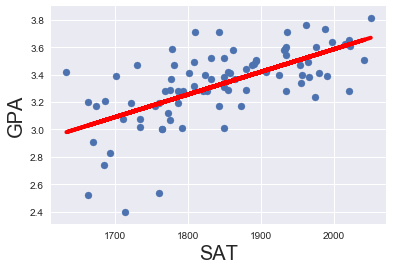

In [45]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x,yhat, lw = 4, c = 'red', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Multiple Linear Regression with SkLearn

Load the data

In [46]:
data_mlr = pd.read_csv("MLinearRegression.csv")

In [47]:
data_mlr.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [48]:
data_mlr.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


Declare variables

In [49]:
x1mlr = data_mlr[['SAT', 'Rand 1,2,3']]
ymlr = data_mlr['GPA']

In [51]:
reg1 = LinearRegression()
reg1.fit(x1mlr, ymlr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
reg1.intercept_

0.29603261264909486

In [56]:
reg1.coef_

array([ 0.00165354, -0.00826982])

In [57]:
reg1.score(x1mlr, ymlr)

0.4066811952814285

Calculating R-Squared in Multiple Linear Regression

### Formula for Adj- Rsquared

$R^2_{adj} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [60]:
x1mlr.shape

(84, 2)

In [63]:
R2 = reg1.score(x1mlr, ymlr)
n = 84
p = 2
AdjR2 = 1 - (1-R2)*(n-1)/(n-p-1)
AdjR2

0.39203134825134023

Feature Selection through f_regression which gives a simple linear regression for every dependent variable to the independent variable

In [64]:
from sklearn.feature_selection import f_regression

In [66]:
f_regression(x1mlr, ymlr)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [71]:
p_values = f_regression(x1mlr,ymlr)[1]
p_values.round(3)

array([0.   , 0.676])

Creating a summary table

In [79]:
reg_summary = pd.DataFrame(data = x1mlr.columns.values, columns = ['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [81]:
reg_summary ['Coefficients'] = reg1.coef_
reg_summary ['P-values'] = p_values.round(3)

In [82]:
reg_summary

,Features,Coefficients,P-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676
